In [1]:
!pip install ipykernel

Error: nu::shell::xdg_config_home_invalid

  × $env.XDG_CONFIG_HOME (=/Users/luca/.config) is invalid, using default
  │ config directory instead: /Users/luca/Library/Application Support/nushell
  help: Set XDG_CONFIG_HOME to an absolute path, or set it to an empty string
        to ignore it


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
def ex1(float_list, u):
  print([x + u for x in float_list])
  print([x - u for x in float_list])

ex1([1.5, 2.0, 2.5], 10)

[11.5, 12.0, 12.5]
[-8.5, -8.0, -7.5]


In [2]:
def concat_str(s1, s2):
  return [c1+c2 for c1 in s1 for c2 in s2]

print(concat_str(['a', 'b', 'c'], ['d', 'e', 'f']))  # ['ad', 'be', 'cf']

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']


In [28]:
import numpy as np


n = 10

rnd = np.random.default_rng(seed=1)
d = dict()
for i in range(n):
    rnd_string = rnd.integers(32, 127, 10, np.byte).tobytes().decode("utf-8") # random string with len=10
    rnd_float = rnd.random() * 100 # random float
    d[rnd_string] = rnd_float

display(d)

def quad(list: dict):
    return {i: np.power(v, 2) for i, v in list.items()}

display(quad(d))

{'~t,LPE^>ge': 14.415961271963374,
 'm_m`apy^J7': 42.332644897257566,
 '[1n=-Hx92t': 40.91991363691613,
 "/|m\\ 0SD '": 75.35131086748066,
 '2*"\\YoghR:': 78.84287034284043,
 '5F9)d+-0Z<': 45.349788948065154,
 '|OT=,B+DF2': 20.34552406761496,
 'w}VO{8!u(9': 48.5190974431635,
 '<r:<]x*o&3': 72.47899407735336,
 '/1{#[;qoTd': 16.065200877512687}

{'~t,LPE^>ge': np.float64(207.81993939474785),
 'm_m`apy^J7': np.float64(1792.052823997307),
 '[1n=-Hx92t': np.float64(1674.4393320526744),
 "/|m\\ 0SD '": np.float64(5677.82004944771),
 '2*"\\YoghR:': np.float64(6216.198203897947),
 '5F9)d+-0Z<': np.float64(2056.6033576340524),
 '|OT=,B+DF2': np.float64(413.9403495858996),
 'w}VO{8!u(9': np.float64(2354.102816699195),
 '<r:<]x*o&3': np.float64(5253.204582465024),
 '/1{#[;qoTd': np.float64(258.0906792348344)}

In [2]:
import numpy as np
a = np.arange(6).reshape((3, 2))
b = np.arange(3) -5 

display(a,b)

array([[0, 1],
       [2, 3],
       [4, 5]])

array([-5, -4, -3])

In [21]:
# compute the inner product between b and each vector in a which is defined by
# fixing index in axis #1 (spalte) and cycling through elements in axis #0 (zeile)

result = np.zeros(a.shape[1])

for i in range(a.shape[1]):
    result[i] = np.inner(b, a[:,i])

result


array([-20., -32.])

# Aufgabe 3

In [5]:
import numpy as np

def selsort(arr: np.array):
    for i in range(len(arr)):
        max_elem = None
        max_elem_idx = None

        for e in range(i+1, len(arr)):
            if max_elem is None or max_elem < arr[e]:
                max_elem = arr[e]
                max_elem_idx = e
        
        if max_elem is not None and arr[i] < max_elem:
            last_val = arr[i]
            arr[i] = max_elem
            arr[max_elem_idx] = last_val
    
    return arr

selsort([3,-7,2,1,-1,9,234,0])

[234, 9, 3, 2, 1, 0, -1, -7]

# Aufgabe 4

In [8]:
def norm(v: np.array):
    norm = np.sqrt(np.inner(v, v))
    print(f"{v} has norm {norm}")

norm(np.array([1, 0, 2]))
norm(np.array([3, 4]))
norm(np.array([-7, 2, -4, np.sqrt(12)]))

[1 0 2] has norm 2.23606797749979
[3 4] has norm 5.0
[-7.          2.         -4.          3.46410162] has norm 9.0


In [20]:
def norm(v: np.array):
    return np.sqrt(np.inner(v, v))

def angle(a:np.array, b:np.array):
    angle = np.inner(a, b) / (norm(a) * norm(b))
    return np.arccos(angle) * (180/np.pi)

a = np.array([3, -2, 2])
b = np.array([1, 2, -1.5])
print(f"{a} and {b} have inner product {np.inner(a, b)}")
print(f"{a} and {b} have angle {angle(a, b)}\n")

a = np.array([2, 0, 5, 1])
b = np.array([-1, 2, 0, 1])
print(f"{a} and {b} have inner product {np.inner(a, b)}")
print(f"{a} and {b} have angle {angle(a, b)}")

[ 3 -2  2] and [ 1.   2.  -1.5] have inner product -4.0
[ 3 -2  2] and [ 1.   2.  -1.5] have angle 111.11873661759337

[2 0 5 1] and [-1  2  0  1] have inner product -1
[2 0 5 1] and [-1  2  0  1] have angle 94.27453941526082


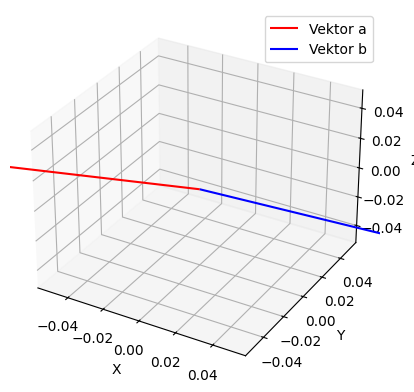

In [24]:
import matplotlib.pyplot as plt

a = np.array([3, -2, 2])
b = np.array([1, 2, -1.5])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = np.zeros(3)
ax.quiver(*origin, *a, color='r', label='Vektor a')
ax.quiver(*origin, *b, color='b', label='Vektor b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()


In [22]:
a = np.array([2, 5, -3])

# 2*1 + 5*1 -3*x = 0
# 7/3 = x
# [1, 1, 7/3] ist orthogonal
# [3, 3, 7] auch

b = np.array([3, 3, 7])
np.inner(a, b)

np.int64(0)